In [81]:
import json
import urllib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

In [17]:
#DONT RUN - this is for making hashmap from URL
params = {}
url='https://aqs.epa.gov/data/api/list/parametersByClass?email=samavedamanjali@gmail.com&key=russetcrane95&pc=CRITERIA'
with urllib.request.urlopen(url) as urlhandle:
    params = json.loads(urlhandle.read().decode())

params_dict = {}
for i in params['Data']:
    #print (i['code'], i['value_represented'])
    params_dict[i['code']] = i['value_represented']
del params_dict['14129']  # Some issue with data for this; ignore for now
del params_dict['81102']
del params_dict['85129']
print (params_dict)

{'42101': 'Carbon monoxide', '42401': 'Sulfur dioxide', '42602': 'Nitrogen dioxide (NO2)', '44201': 'Ozone', '88101': 'PM2.5 - Local Conditions'}


In [ ]:
#initializing the dictionary with ID name pairs obtained from EPA API
params_dict = {'42101': 'CarbonMonoxide', '42401': 'SulfurDioxide', '42602': 'NitrogenDioxide', '44201': 'Ozone', '88101': 'PM2.5LocalConditions'}

In [2]:
#DONT RUN - we already have data in the files
def get_param_data(p,y):
    url='https://aqs.epa.gov/data/api/dailyData/byCounty?email=samavedamanjali@gmail.com&key=russetcrane95&param=' + p + '&bdate=' + y + '0101&edate=' + y + '1231&state=24&county=005'    
    with urllib.request.urlopen(url) as urlhandle:
        data = json.loads(urlhandle.read().decode())
        #print(json.dumps(data))
    df = pd.DataFrame.from_dict(data['Data'])
    return df
    #dfc.groupby('date_local').mean().plot(figsize=(15,5))

In [112]:
def readAndDisplayFile(c,p,y):
    f_name = 'data/'+c+'_'+p+'_'+y+'.json'
    with open(f_name) as json_file:
        data = json.load(json_file)
        #print(data)
        for p in data.keys():
            df = pd.DataFrame.from_dict(data['Data'])
            
            if (df.size != 0) :
                # get only the needed cols out of 30+ columns
                df = df[['date_local','arithmetic_mean']]
                # agggregate by date so that we have one value per day
                df = df.groupby('date_local').mean().reset_index()
            return df;
    
#df = readAndDisplayFile('Baltimore','p','2011');

In [24]:
'''
for p in params_dict.keys():
    print(p, params_dict[p])
    df = readAndDisplayFile('Baltimore',p,'2011');    
    df.columns = ['date_local', params_dict[p]]
    df.groupby('date_local').mean().plot(figsize=(15,5))
'''


"\nfor p in params_dict.keys():\n    print(p, params_dict[p])\n    df = readAndDisplayFile('Baltimore',p,'2011');    \n    df.columns = ['date_local', params_dict[p]]\n    df.groupby('date_local').mean().plot(figsize=(15,5))\n"

In [19]:
#df.columns = ['date_local', params_dict['42602']]
#df.groupby('date_local').mean().plot(figsize=(15,5))

In [20]:
#df.info()

In [21]:
#df['date_local'].value_counts()

In [39]:
df = readAndDisplayFile('Baltimore','42401' ,'2011');
for row in df.iterrows():
    print (row[1][0], row[1][1])

2011-12-31 1.201408
2011-12-30 1.70493
2011-12-29 1.289568
2011-12-28 0.321831
2011-12-27 0.877465
2011-12-26 0.821479
2011-12-25 1.273592
2011-12-24 0.457042
2011-12-23 0.284507
2011-12-22 1.033803
2011-12-21 1.059859
2011-12-20 1.679577
2011-12-19 3.397183
2011-12-18 1.148239
2011-12-17 1.358803
2011-12-16 0.687324
2011-12-15 3.502817
2011-12-14 3.703887
2011-12-13 4.932746
2011-12-12 2.559124
2011-12-11 1.37007
2011-12-10 1.459859
2011-12-09 3.427817
2011-12-08 0.889437
2011-12-07 0.100712
2011-12-06 0.419188
2011-12-05 0.453873
2011-12-04 1.045423
2011-12-03 1.035915
2011-12-02 3.922509
2011-12-01 1.742029
2011-11-30 1.1
2011-11-29 0.389085
2011-11-28 0.993662
2011-11-27 1.898592
2011-11-26 3.483803
2011-11-25 1.774648
2011-11-24 1.162324
2011-11-23 0.576761
2011-11-22 0.326056
2011-11-21 0.686268
2011-11-20 2.278873
2011-11-19 5.527817
2011-11-18 1.285915
2011-11-17 0.952817
2011-11-16 0.639437
2011-11-15 1.498239
2011-11-14 2.156272
2011-11-13 2.098592
2011-11-12 1.894366
2011-11

2011-11-22 0.329167
2011-11-21 0.6625
2011-11-21 0.7
2011-11-21 0.683333
2011-11-21 0.683333
2011-11-20 2.25
2011-11-20 2.3
2011-11-20 2.2875
2011-11-20 2.2875
2011-11-19 5.45
2011-11-19 5.5
2011-11-19 5.4875
2011-11-19 5.4875
2011-11-18 1.225
2011-11-18 1.3
2011-11-18 1.254167
2011-11-18 1.254167
2011-11-17 0.9125
2011-11-17 0.9
2011-11-17 0.941667
2011-11-17 0.941667
2011-11-16 0.6125
2011-11-16 0.6
2011-11-16 0.645833
2011-11-16 0.645833
2011-11-15 1.4625
2011-11-15 1.5
2011-11-15 1.495833
2011-11-15 1.495833
2011-11-14 2.014286
2011-11-14 2.1
2011-11-14 2.126087
2011-11-14 2.126087
2011-11-13 2.0625
2011-11-13 2.1
2011-11-13 2.0875
2011-11-13 2.0875
2011-11-12 1.825
2011-11-12 1.9
2011-11-12 1.870833
2011-11-12 1.870833
2011-11-11 1.05
2011-11-11 1.1
2011-11-11 1.075
2011-11-11 1.075
2011-11-10 0.8125
2011-11-10 0.9
2011-11-10 0.854167
2011-11-10 0.854167
2011-11-09 1.8875
2011-11-09 1.9
2011-11-09 1.925
2011-11-09 1.925
2011-11-08 4.3
2011-11-08 4.3
2011-11-08 4.345833
2011-11-08 

2011-06-10 2.925
2011-06-10 3.0
2011-06-10 2.966667
2011-06-10 2.966667
2011-06-09 2.2
2011-06-09 2.2
2011-06-09 2.229167
2011-06-09 2.229167
2011-06-08 2.325
2011-06-08 2.4
2011-06-08 2.35
2011-06-08 2.35
2011-06-07 2.15
2011-06-07 2.2
2011-06-07 2.1875
2011-06-07 2.1875
2011-06-06 1.471429
2011-06-06 1.5
2011-06-06 1.452174
2011-06-06 1.452174
2011-06-05 5.8375
2011-06-05 5.9
2011-06-05 5.8625
2011-06-05 5.8625
2011-06-04 1.5125
2011-06-04 1.6
2011-06-04 1.554167
2011-06-04 1.554167
2011-06-03 1.128571
2011-06-03 1.1
2011-06-03 1.134783
2011-06-03 1.134783
2011-06-02 1.4625
2011-06-02 1.5
2011-06-02 1.4875
2011-06-02 1.4875
2011-06-01 1.075
2011-06-01 1.1
2011-06-01 1.108333
2011-06-01 1.108333
2011-05-31 11.1875
2011-05-31 11.2
2011-05-31 11.2375
2011-05-31 11.2375
2011-05-30 1.475
2011-05-30 1.5
2011-05-30 1.5125
2011-05-30 1.5125
2011-05-29 1.725
2011-05-29 1.7
2011-05-29 1.741667
2011-05-29 1.741667
2011-05-28 1.6375
2011-05-28 1.7
2011-05-28 1.675
2011-05-28 1.675
2011-05-27 2.5

2011-01-06 4.929167
2011-01-06 4.929167
2011-01-05 3.833333
2011-01-05 3.7
2011-01-05 3.685
2011-01-05 3.685
2011-01-04 5.75
2011-01-04 5.8
2011-01-04 5.779167
2011-01-04 5.779167
2011-01-03 4.0125
2011-01-03 4.1
2011-01-03 4.058333
2011-01-03 4.058333
2011-01-02 2.875
2011-01-02 2.9
2011-01-02 2.920833
2011-01-02 2.920833
2011-01-01 5.7375
2011-01-01 5.8
2011-01-01 5.766667
2011-01-01 5.766667


In [113]:
df_master = {}

for p in params_dict.keys():
    print(p, params_dict[p])
    df_master[p] = readAndDisplayFile('Baltimore',p,'2011');   



42101 Carbon monoxide
42401 Sulfur dioxide
42602 Nitrogen dioxide (NO2)
44201 Ozone
88101 PM2.5 - Local Conditions


In [114]:
p='42401'
# reset_index makes the mean return a good dataframe
df = df_master[p].groupby('date_local').mean().reset_index()
df['date_local']

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
325    2011-12-27
326    2011-12-28
327    2011-12-29
328    2011-12-30
329    2011-12-31
Name: date_local, Length: 330, dtype: object

In [51]:
for p in params_dict.keys():
    print (p, df_master[p]['date_local'].size)
    df_master[p].groupby('date_local').size

42101 710
42401 1627
42602 704
44201 2250
88101 1016


In [96]:
def dayofyear():
    x = datetime.date(2019, 4, 13)
    y = datetime.date(2019,4,14)
    one_day = y-x
    num_days = datetime.date(2011, 12, 31) - datetime.date(2010, 1, 1)
    begin = datetime.date(2010, 1, 1)
    end = datetime.date(2011, 12, 31)
    for d in range(0, num_days.days):
        newDate = (str(begin + (d*one_day)))
        print(newDate)
    return newDate

#dayofyear()

In [116]:
newDate='2011-01-01'
p='42401'
df = df_master[p]
df[df.date_local==newDate]['arithmetic_mean'].values[0]

5.764908799999999

In [151]:
x = datetime.date(2019, 4, 13)
y = datetime.date(2019,4,14)
one_day = y-x
num_days = datetime.date(2011, 12, 31) - datetime.date(2011, 1, 1)
begin = datetime.date(2011, 1, 1)
end = datetime.date(2011, 12, 31)

data_master = {}
data_master['date_local'] = []
for p in params_dict.keys():
    data_master[p] = []
    
df_new = pd.DataFrame(data_master)            

for d in range(0, num_days.days):
    new_date = str(begin + (d*one_day))
    data_master['date_local'].append(new_date)
    for p in params_dict.keys():
        df = df_master[p]
        try:
            val = df[df.date_local==new_date]['arithmetic_mean'].values[0]
            #print(new_date,p, val)
            data_master[p].append(val)
            #print (data_master[p])
        except:
            data_master[p].append(0) #### TBD to think about missing data later 

df_new = pd.DataFrame(data_master)            

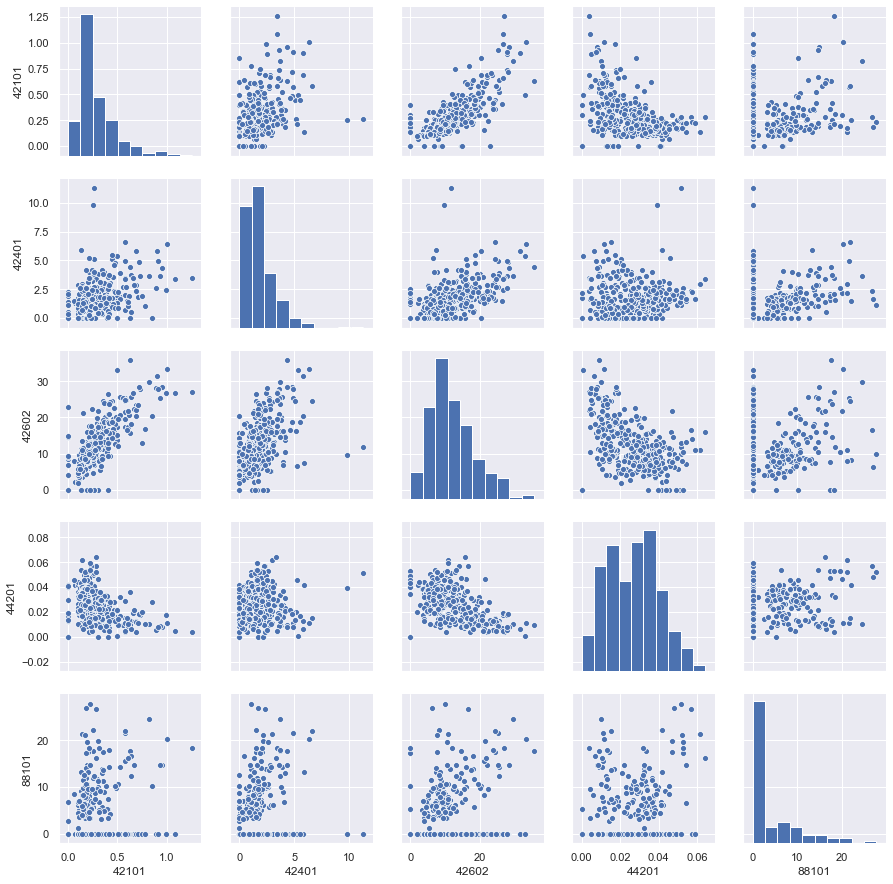

In [161]:
sns.set()
cols = params_dict.keys()
sns.pairplot(df_new[cols], height=2.5)
plt.show()

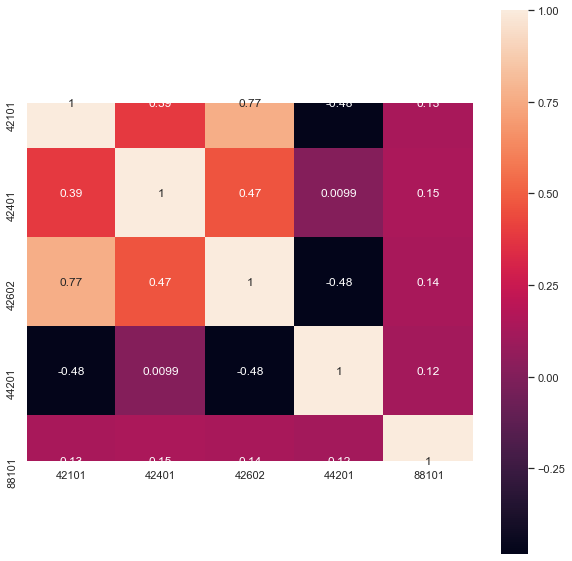

In [167]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [168]:
corrmat

,42101,42401,42602,44201,88101
42101,1.000000,0.389113,0.767718,-0.475090,0.131997
42401,0.389113,1.000000,0.469317,0.009882,0.145622
42602,0.767718,0.469317,1.000000,-0.484023,0.135425
44201,-0.475090,0.009882,-0.484023,1.000000,0.115413
88101,0.131997,0.145622,0.135425,0.115413,1.000000
